# Project 3b

The final part of the project will ask you to perform your own data science project to classify a new dataset.

## Submission Details

**Project is due June 14th at 11:59 pm (Friday Midnight). To submit the project, please save the notebook
as a pdf file and submit the assignment via Gradescope. In addition, make sure that
all figures are legible and suﬀiciently large. For best pdf results, we recommend printing the notebook using [$\LaTeX$](https://www.latex-project.org/)**

## Loading Essentials and Helper Functions

In [ ]:
# fix for windows memory leak with MKL
import os
import platform

if platform.system() == "Windows":
    os.environ["OMP_NUM_THREADS"] = "2"

In [ ]:
# import libraries
import time
import random
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # this is used for the plot the graph

# Sklearn classes
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    KFold,
)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, silhouette_score
import sklearn.metrics.cluster as smc
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder,
    MinMaxScaler,
)
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import tree
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/CM148_Project3')

import helper as hel

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Sets random seed for reproducibility
SEED = 42
random.seed(SEED)

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/CM148_Project3'

/content/drive/MyDrive/CM148_Project3


# (100 pts) Putting it all together: Classify your own data

Through the course of this program, you have acquired knowledge and skills in applying various models to tackle supervised learning tasks. Now, we challenge you to harness your cumulative learning and create a model capable of predicting whether a hotel reservation will be canceled or not.

### Context
Hotels welcome millions of guests every year, and their primary objective is to keep rooms occupied and paid for. Cancellations can be detrimental to the business, as it may become challenging to rebook a room on short notice. Consequently, it is beneficial for hotels to anticipate which reservations are likely to be canceled. The provided dataset offers a diverse range of information about bookings, which you will utilize to predict cancellations.

### Challenge
The goal of this project is to develop a predictive model that can determine whether a reservation will be canceled based on the available input parameters.

While we will provide specific instructions to guide you in the right direction, you have the freedom to choose the models and preprocessing techniques that you deem most appropriate. Upon completion, we request that you provide a detailed description outlining the models you selected and the rationale behind your choices.

### Data Description
Refer to https://www.kaggle.com/competitions/m-148-spring-2024-project-3/data for information

## (50 pts) Preprocessing
For the dataset, the following are mandatory pre-processing steps for your data:

- **Use One-Hot Encoding on all categorical features** (specify whether you keep the extra feature or not for features with multiple values)
- Determine which fields need to be dropped
- **Handle missing values** (Specify your strategy)
- **Rescale the real valued features using any strategy you choose** (StandardScaler, MinMaxScaler, Normalizer, etc)
- **Augment at least one feature**
- **Implement a train-test split with 20% of the data going to the test data**. Make sure that the test and train data are balanced in terms of the desired class.

After writing your preprocessing code, write out a description of what you did for each step and provide a justification for your choices. All descriptions should be written in the markdown cells of the jupyter notebook. Make sure your writing is clear and professional.  

We highly recommend reading through the [scikit-learn documentation](https://scikit-learn.org/stable/data_transforms.html) to make this part easier.

In [ ]:
#Load the data
data = pd.read_csv("/content/drive/MyDrive/CM148_Project3/datasets/hotel_booking.csv")

###Exploring the data

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,name,email,phone-number
0,City Hotel,1,157,May,1,3,2,0.0,0,BB,...,0,Non Refund,0,Transient,130.00,0,0,Taylor Juarez,Juarez.Taylor44@zoho.com,634-458-8010
1,Resort Hotel,0,167,September,2,8,2,0.0,0,BB,...,0,No Deposit,0,Contract,62.48,0,2,Yolanda Taylor,Taylor.Yolanda35@xfinity.com,571-733-2380
2,City Hotel,0,124,April,1,1,2,0.0,0,SC,...,0,No Deposit,0,Transient,99.00,0,1,Angie Dixon,Angie_Dixon@hotmail.com,818-661-8987
3,Resort Hotel,0,8,July,2,4,2,1.0,0,BB,...,0,No Deposit,0,Transient,169.00,1,2,Jennifer Higgins,Higgins.Jennifer@yandex.com,669-803-3888
4,City Hotel,0,43,July,0,2,2,0.0,0,HB,...,1,No Deposit,0,Transient-Party,43.00,0,0,Jeremy Wilcox,Jeremy_Wilcox@hotmail.com,100-100-0744


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69591 entries, 0 to 69590
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           69591 non-null  object 
 1   is_canceled                     69591 non-null  int64  
 2   lead_time                       69591 non-null  int64  
 3   arrival_date_month              69591 non-null  object 
 4   stays_in_weekend_nights         69591 non-null  int64  
 5   stays_in_week_nights            69591 non-null  int64  
 6   adults                          69591 non-null  int64  
 7   children                        69588 non-null  float64
 8   babies                          69591 non-null  int64  
 9   meal                            69591 non-null  object 
 10  country                         69591 non-null  object 
 11  previous_cancellations          69591 non-null  int64  
 12  previous_bookings_not_canceled  

In [ ]:
#Checking for null values:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          3
babies                            0
meal                              0
country                           0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
name                              0
email                             0
phone-number                      0
dtype: int64

**Observations:**
* `is_cancelled` (label) is already a binary feature, so we don't need to convert it using a label encoder.
*   Some features like `name`, `email`, `phone-number` are unlikely to be worth one-hot encoding since they are not going to be very informative in predicting whether reservations would be cancelled, so we can drop them.
* Categorical features that need to be one-hot encoded: `hotel`, `arrival_date_month`, `meal`, `country`,`reserved_room_type`, `deposit_type`, `customer_type`
* The only null values present in this dataset are in the `children` column, so only that column must be imputed/changed to handle missing values
* The numerical features that might need rescaling are: `lead_time`, `adr`, `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, `babies`, `previous_cancellations`, `previous_bookings_not_cancelled`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces`, `total_of_special_requests`


###Visually Examining Data

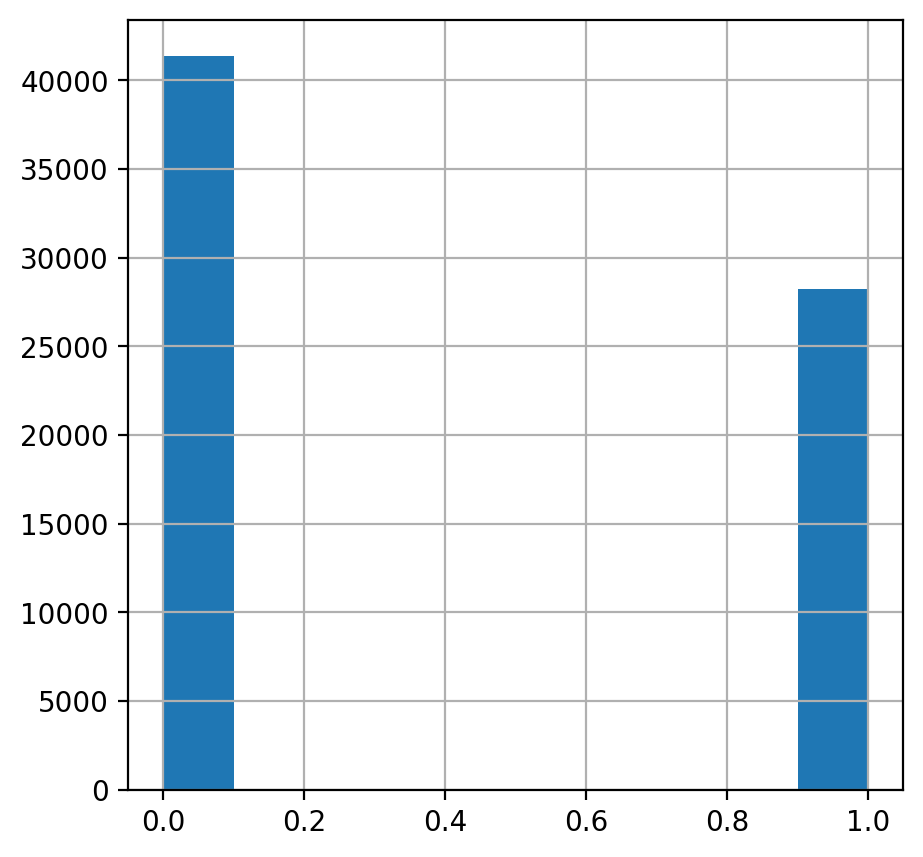

is_canceled
0    41350
1    28241
Name: count, dtype: int64


In [ ]:
data['is_canceled'].hist(figsize=(5,5))
plt.show()
count = data['is_canceled'].value_counts()
print(count)

**Observation:** Notice that this dataset has significantly larger number of samples of negative (0) observations than positive (1) observations. This means that the dataset has more examples of people who did not cancel than people who cancelled. Thus the final model might be more inclined to predict 0 (unlikely to cancel) rather than 1 (likely to cancel). Balanced datasets are important to ensure that classifiers train adequately and don't overfit, and this particular dataset might be enriched by obtaining more samples of people who did cancel. However, it should not be ignored that balancing a dataset artificially has its own consequences as discussed in Project 2.

###Pre-processing the data

**Dropping the irrelevant features**: As noted above, we drop `name`, `email` and `phone-number`

In [ ]:
to_drop = ['name', 'email', 'phone-number']
data = data.drop(columns=to_drop)
data.head() #to ensure that the correct columns were dropped

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,City Hotel,1,157,May,1,3,2,0.0,0,BB,...,0,0,A,0,Non Refund,0,Transient,130.00,0,0
1,Resort Hotel,0,167,September,2,8,2,0.0,0,BB,...,0,0,D,0,No Deposit,0,Contract,62.48,0,2
2,City Hotel,0,124,April,1,1,2,0.0,0,SC,...,0,0,A,0,No Deposit,0,Transient,99.00,0,1
3,Resort Hotel,0,8,July,2,4,2,1.0,0,BB,...,0,0,A,0,No Deposit,0,Transient,169.00,1,2
4,City Hotel,0,43,July,0,2,2,0.0,0,HB,...,0,0,A,1,No Deposit,0,Transient-Party,43.00,0,0


**Missing Values:** Impute the missing values in the children column using the median value of the children column in the dataset.

Median is chosen to impute since this is a better representative of the mid/average value of the `children` feature because it is less sensitive to outliers.

In [ ]:
#Creating a missing variable to indicate the 'missingness' of the values
data['children_na'] = data['children'].isnull()

#Replacing the missing values with the median of the children column
median_children = data['children'].median()
data['children'].fillna(value=median_children, inplace=True)

#Checking that the imputing has been successfully completed
nan_count = np.sum(data['children'].isnull(), axis=0)
if nan_count==0:
  print("No missing values!")
else: print("Error.")

No missing values!


**Train-Test Split:** Implementing a train-test split with 20% of the prepared data going to training data as instructed in the specifications.

1. Separate the label (`is_canceled`) from the rest of the dataset
2. Use `random_state=0` to ensure the same train/test split happens every time

In [ ]:
#Separating label
y = data['is_canceled']
x = data.drop(['is_canceled'], axis=1) #new dataframe without the target variable

In [ ]:
#Creating a train test split
train_raw, test_raw, train_target, test_target = train_test_split(x,y, test_size=0.2,
                                                                  stratify=y, random_state=0)

**One Hot Encoding:** As noted above, the categorical features that need to be one-hot encoded are: `hotel`, `arrival_date_month`, `meal`, `country`,`reserved_room_type`, `deposit_type`, `customer_type`

**Rescaling Numerical Data**: For this dataset, I use StandardScaler to rescale the real valued features. The numerical features that are rescaled are: `lead_time`, `adr`, `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, `babies`, `previous_cancellations`, `previous_bookings_not_cancelled`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces`, `total_of_special_requests`

In [ ]:
#Defining list of features
num_features = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
                'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
                'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces',
                'total_of_special_requests']

cat_features = ['hotel', 'arrival_date_month', 'meal', 'country', 'reserved_room_type',
                'deposit_type', 'customer_type']

#Creating the pipeline
cat_pipeline = Pipeline([("one_hot", OneHotEncoder())]) #Applies one-hot encoding to categorical features
num_pipeline = Pipeline([("scaler", StandardScaler())]) #Rescales numerical features

full_pipeline = ColumnTransformer([("cat", cat_pipeline, cat_features),
                                   ("num", num_pipeline, num_features)])

#Applying the pipeline to the dataset
train_processed = full_pipeline.fit_transform(train_raw)
test_processed = full_pipeline.transform(test_raw)

**Augmenting the Features**:

In [ ]:
#TOASK: What do we have to do here?

## (50 pts) Try out a few models
Now that you have pre-processed your data, you are ready to try out different models.

For this part of the project, we want you to experiment with all the different models demonstrated in the course to determine which one performs best on the dataset.

You must perform classification using at least 3 of the following models:
- Logistic Regression
- K-nearest neighbors
- SVM
- Decision Tree
- Multi-Layer Perceptron

Due to the size of the dataset, be careful which models you use and look at their documentation to see how you should tackle this size issue for each model.

For full credit, you must perform some hyperparameter optimization on your models of choice. You may find the following scikit-learn library on [hyperparameter optimization](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) useful.

For each model chosen, write a description of which models were chosen, which parameters you optimized, and which parameters you choose for your best model.
While the previous part of the project asked you to pre-process the data in a specific manner, you may alter pre-processing step as you wish to adjust for your chosen classification models.


In [1]:
x.shape #Checking the number of samples in the dataset

NameError: name 'x' is not defined

**Initial Thoughts** (before actually coding anything):
1. KNN: Would not be a good model to try for this dataset since the computational complexity for KNN increases with the number of samples in the dataset, and since the dataset in question has ~70k datapoints, KNN would take a long time to run + might not be computationally or economically efficient, so will not be trying this model for this dataset.

2. Decision Tree: Could work, but there needs to be some sort of pruning/depth limitation to prevent it from overfitting to the dataset. Without a depth limitation, the model would also take a long time to train.

3. SVM: By default, we know that SVM uses a linear kernel. Perhaps using a Gaussian kernel will make the model more likely to overfit since this dataset has a lot of samples. However, it might also be possible that the Gaussian kernel will enable the model to capture more complexities in the dataset. Yet since

4. Multi-layer perceptron/Logistic Regression: No initial thoughts.


###Logistic Regression

Notes:

1.   The default Logistic Regression model does not converge as the max_iter limit is reached before it can converge. Documentation shows that the default `max_iter=100`. Change this to `1000`.
2. Since the sample size is large, using fewer folds for the cross validation will still give a fairly good model. Since we have ~70k samples, we choose small `k = 3`.



In [ ]:
#Trying the default logistic regression model
log_reg = LogisticRegression() #by default, max_iter=100
log_reg.fit(train_processed, train_target)
testing_result = log_reg.predict(test_processed)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Trying the default logistic regression model with max_iter=1000 since the earlier one did not converge
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(train_processed, train_target)
testing_result = log_reg.predict(test_processed)
print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_target,testing_result)))

Accuracy:    0.813205


In [ ]:
#Checking different parameters using GridSearch CV:
param_log_reg = [{
    "C": [0.001, 0.1, 10, 1.0],
    "max_iter": [1000]
}]

k = 3 #Justified above
kf = KFold(n_splits=k, random_state=None)

log_reg = LogisticRegression()
grid = GridSearchCV(log_reg, param_log_reg, cv=kf, scoring="accuracy")
grid.fit(train_processed, train_target)
res = pd.DataFrame(grid.cv_results_)

In [ ]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.325222,0.014507,0.015226,0.001608,0.001,1000,"{'C': 0.001, 'max_iter': 1000}",0.802780,0.801638,0.805895,0.803438,0.001799,4
1,1.209816,0.091801,0.008536,0.001545,0.1,1000,"{'C': 0.1, 'max_iter': 1000}",0.809408,0.804117,0.809668,0.807731,0.002558,1
2,4.113033,0.741479,0.011725,0.002392,10,1000,"{'C': 10, 'max_iter': 1000}",0.809408,0.802878,0.810584,0.807623,0.003390,3
3,2.756169,0.192701,0.008351,0.002292,1.0,1000,"{'C': 1.0, 'max_iter': 1000}",0.809570,0.802932,0.810530,0.807677,0.003378,2


###SVM

In [ ]:
svm = SVC()
svm.fit(train_processed, train_target)
predicted = svm.predict(test_processed)
print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_target,predicted)))

Accuracy:    0.851713


In [ ]:
#Checking different parameters using GridSearch CV:
param_svm = [{
    "C": [0.001, 0.1, 10],
    "kernel": ["linear", "rbf"]
}]

k = 3 #Justified above
kf = KFold(n_splits=k, random_state=None)

svm = SVC()
grid = GridSearchCV(svm, param_svm, cv=kf, scoring="accuracy")
grid.fit(train_processed, train_target)
res_svm = pd.DataFrame(grid.cv_results_)

In [ ]:
res_svm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,51.327200,0.883909,15.235577,0.184400,0.001,linear,"{'C': 0.001, 'kernel': 'linear'}",0.798092,0.796519,0.798351,0.797654,0.000810,5
1,105.294746,3.664020,58.779296,1.168802,0.001,rbf,"{'C': 0.001, 'kernel': 'rbf'}",0.755900,0.754109,0.757666,0.755892,0.001452,6
2,55.868919,6.910432,12.246863,0.329647,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.810755,0.804656,0.810961,0.808791,0.002925,4
3,58.881133,1.583457,33.171373,1.493925,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.824388,0.821253,0.826103,0.823915,0.002008,2
4,546.824650,31.644746,13.040582,0.045860,10,linear,"{'C': 10, 'kernel': 'linear'}",0.811510,0.805788,0.811015,0.809437,0.002589,3
5,151.785820,31.631121,26.349459,1.035108,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.853055,0.851323,0.853317,0.852565,0.000885,1


###Multi-Layer Perceptron

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.0001,
                    solver='adam', random_state=0, verbose=False)
mlp.fit(train_processed, train_target)
predicted = mlp.predict(test_processed)
print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_target,predicted)))

Accuracy:    0.857174


In [ ]:
#Checking different parameters using GridSearch CV:
param_mlp = [{
    "hidden_layer_sizes": [(100,), (50,)],
    "max_iter": [500],
    "alpha": [0.0001, 0.01, 10],
    "random_state":[0],
    "verbose":[False]
}]

k = 3 #Justified above
kf = KFold(n_splits=k, random_state=None)

mlp = MLPClassifier()
grid = GridSearchCV(mlp, param_mlp, cv=kf, scoring="accuracy")
grid.fit(train_processed, train_target)
res_mlp = pd.DataFrame(grid.cv_results_)

## Extra Credit

We have provided an extra test dataset named `hotel_booking_test.csv` that does not have the target labels. Classify the samples in the dataset with any method of your choosing and save the predictions into a csv file. Submit the file to our [Kaggle](https://www.kaggle.com/competitions/m-148-spring-2024-project-3/) contest. The website will specify your classification accuracy on the test set. We will award a bonus point for the project for every percentage point over 75% that you get on your kaggle test accuracy.

To get the bonus points, you must also write out a summary of the model that you submit including any changes you made to the pre-processing steps. The summary must be written in a markdown cell of the jupyter notebook. Note that you should not change earlier parts of the project to complete the extra credit.

**Please refer to *Submission and evaluation* section on the contest page for the `csv` file formatting**

### Model description

In [ ]:
#TODO